In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
atlas = pd.read_csv('dados/atlas.csv')
pnad = pd.read_csv('dados/pnad_amostra.csv')

### Criar variável categórica a partir de variável numérica 

O problema de gráficos como o que está abaixo é o fato de a variável no eixo x é uma variável numérica, então está sendo criado um boxplot para cada idade.  

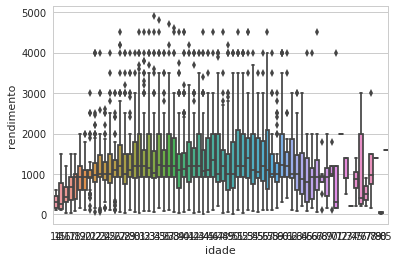

In [7]:
sns.boxplot('idade', 'rendimento', data=pnad.query('rendimento < 5000'));

A solução é usar `pd.cut()` para criar categorias.

In [12]:
pnad['idade_cat'] = pd.cut(pnad.idade, [0, 15, 25, 60, 105], 
                           labels=['crianca', 'jovem', 'adulto', 'idoso'])

In [15]:
pnad.idade_cat[:10] # as dez primeiras observações

0      jovem
1     adulto
2      idoso
3      jovem
4     adulto
5     adulto
6      jovem
7    crianca
8     adulto
9     adulto
Name: idade_cat, dtype: category
Categories (4, object): [crianca < jovem < adulto < idoso]

O boxplot correto.

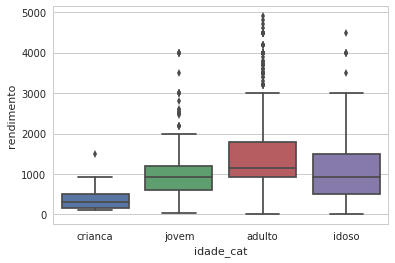

In [14]:
sns.boxplot('idade_cat', 'rendimento', data=pnad.query('rendimento < 5000'));

## Como trocar os rótulos de um eixo?

<br>

Usando `plt.xticks` (ou `yticks`). 
O primeiro argumento é a posição no eixo e o segundo são os novos rótulos.

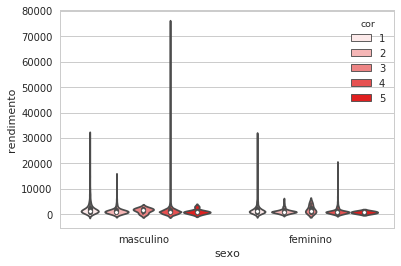

In [6]:
sns.violinplot('sexo', 'rendimento', hue = 'cor', data = pnad, color = 'red')

plt.xticks([0, 1], ['masculino', 'feminino']);

## Como trocar os rótulos da legenda?

<br>
São necessários três passos:

- atribuir o gráfico a um objeto.
- criar um objeto com a lista dos novos nomes.
- criar uma estrutura de repetição usando `zip()`.

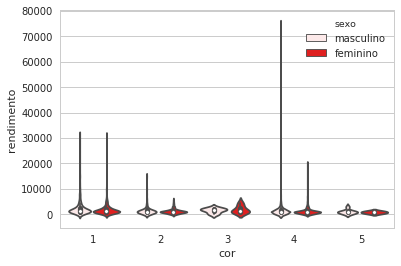

In [7]:
g = sns.violinplot('cor', 'rendimento', hue = 'sexo', data = pnad, color = 'red')
nomes = ['masculino', 'feminino']

for t, l in zip(g.legend_.texts, nomes): 
    t.set_text(l);

## Como criar barras agrupadas?

Uma dificuldade com o gráfico abaixo é o fato de sobrepor três variáveis, sendo que uma delas tem uma escala muito diferente das outras.

Por isso, é melhor fazer dois gráficos separados. Um apenas com rdpc e outro com pmpob e pind.

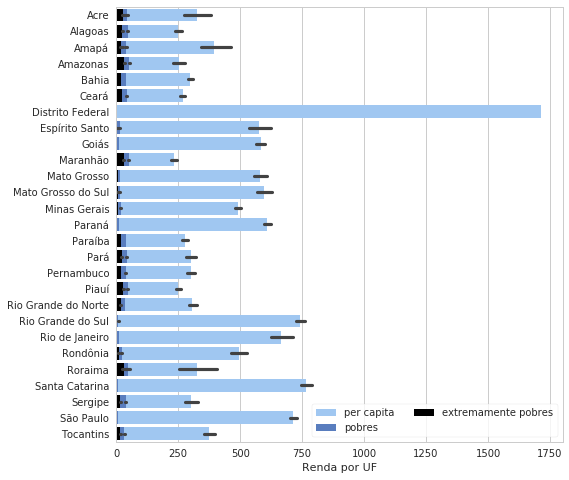

In [8]:
atlas.nome_uf = atlas.nome_uf.astype('category')
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes('pastel')
sns.barplot('rdpc','nome_uf', data=atlas, label='per capita', color='b')
sns.set_color_codes('muted')
sns.barplot('pmpob','nome_uf', data=atlas, label='pobres', color='b')
sns.set_color_codes('muted')
sns.barplot('pind','nome_uf', data=atlas, label='extremamente pobres', color='#000000')
ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(ylabel='', xlabel='Renda por UF');

### RDPC com seaborn 

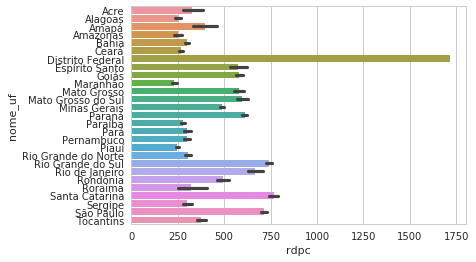

In [9]:
sns.barplot('rdpc', 'nome_uf', data=atlas);

### RDPC com pandas

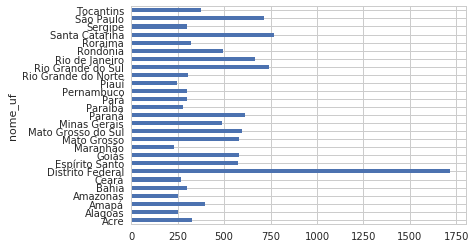

In [10]:
atlas.groupby('nome_uf').rdpc.mean().plot.barh();

### PMPOB e PIND com pandas

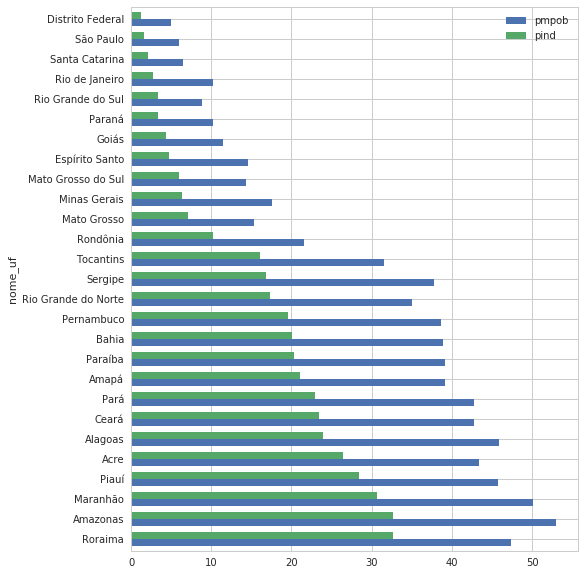

In [11]:
(atlas[['nome_uf', 'pmpob', 'pind']]
 .groupby('nome_uf').mean()
 .sort_values(by='pind', ascending=False)
 .plot.barh(figsize=(8, 10), width=.7));

### PMPOB e PIND com seaborn.

Ainda não sabemos como ordenar as barras. :(

In [12]:
atlasm = pd.melt(atlas[['nome_uf', 'pmpob', 'pind']], id_vars='nome_uf')

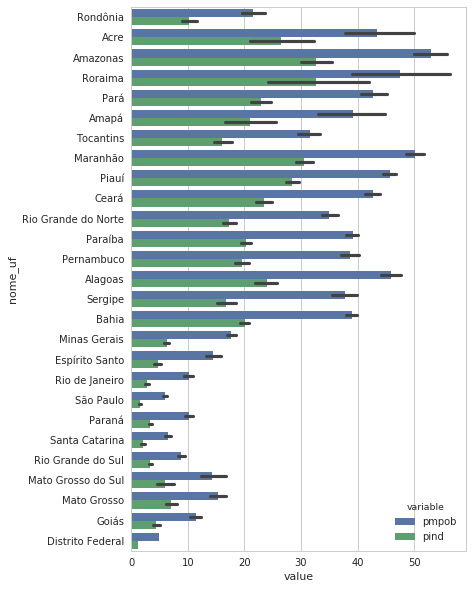

In [13]:
plt.figure(figsize=(6, 10))
sns.barplot('value', 'nome_uf', hue='variable', data=atlasm);